# 1 answer

To install and load the latest versions of TensorFlow and Keras in Python, you can use pip, the Python package manager. Here are the steps to install and load TensorFlow and Keras and print their versions:

In [11]:
# Install the latest version of TensorFlow and Keras
!pip install tensorflow
!pip install keras

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

# Print the versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.13.0


# 2 answer



You can load and explore the Wine Quality dataset as follows:

In [2]:
from sklearn.datasets import load_wine

# Load the Wine Quality dataset
wine_data = load_wine()

# Explore the dataset dimensions
data = wine_data.data  # Features
target = wine_data.target  # Target labels
feature_names = wine_data.feature_names  # Feature names
target_names = wine_data.target_names  # Target class names

# Print the dimensions
print("Data shape:", data.shape)  # (number of samples, number of features)
print("Target shape:", target.shape)  # (number of samples,)
print("Number of features:", len(feature_names))
print("Number of target classes:", len(target_names))


Data shape: (178, 13)
Target shape: (178,)
Number of features: 13
Number of target classes: 3


# 3 answer

The Wine Quality dataset obtained from scikit-learn's load_wine function is typically a clean dataset without missing values or categorical variables. However, I'll provide you with code to check for null values and encode categorical variables just in case. Please note that in this specific dataset, there should be no null values or categorical variables.

Checking for Null Values:
You can check for null values in a dataset using Pandas:

In [3]:
import pandas as pd

wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

null_values = wine_df.isnull().sum()
print("Null Values:\n", null_values)


Null Values:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


Since the Wine Quality dataset is generally clean, you should see all zeros in the output, indicating no null values.

Encoding Categorical Variables:
In the Wine Quality dataset, there are no categorical variables; all features are numeric. However, if you were working with a dataset containing categorical variables, you could encode them using techniques like one-hot encoding. Here's an example of how you can encode categorical variables using Pandas:

In [4]:
# Assuming 'categorical_column' is a categorical variable
encoded_df = pd.get_dummies(wine_df, columns=['total_phenols'])


# 4 answer



In [5]:
import pandas as pd
from sklearn.datasets import load_wine

wine_data = load_wine()

wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

X = wine_df  # Features
y = wine_data.target

print("Features shape (X):", X.shape)
print("Target variable shape (y):", y.shape)


Features shape (X): (178, 13)
Target variable shape (y): (178,)


# 5 answer



In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val =train_test_split(X_train, y_train, test_size=0.3, random_state=42)

print("Training data shape (X_train):", X_train.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Validation data shape (X_val):", X_val.shape)
print("Validation labels shape (y_val):", y_val.shape)
print("Test data shape (X_shape):", X_test.shape)
print("Test labels shape (y_test):", y_test.shape)

Training data shape (X_train): (86, 13)
Training labels shape (y_train): (86,)
Validation data shape (X_val): (38, 13)
Validation labels shape (y_val): (38,)
Test data shape (X_shape): (54, 13)
Test labels shape (y_test): (54,)


# 6 answer

Scaling is an important preprocessing step in machine learning to ensure that features are on similar scales, which can help improve the performance of many algorithms. One common scaling technique is standardization (also known as z-score normalization). Here's how you can perform standardization on your dataset:

In [7]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_val_scaled =scaler.transform(X_val)
X_test_scaled =scaler.transform(X_test)

print("Scaled Training data shape (X_train_scaled):", X_train_scaled)
print("Scaled Validation data shape (X_val_scaled):",X_val_scaled.shape)
print("Scaled Test data shape (X_test_scaled):",X_test_scaled.shape)

Scaled Training data shape (X_train_scaled): [[ 1.14062433 -0.76145743  0.87790485 ...  0.76307463 -0.06208867
   1.44243584]
 [-1.44713117 -0.28013718  1.45177519 ...  0.06973688 -0.23737942
  -0.89738907]
 [-0.2674191  -0.60674735 -0.34156963 ... -0.32026561 -0.26434723
  -0.81986475]
 ...
 [ 1.02645865 -0.67550738 -0.44917032 ... -0.14693117  0.78739726
   1.19576755]
 [-0.29278925  0.94035345 -0.05463446 ... -0.7536017  -1.78802836
  -0.42519549]
 [-1.13000427  1.58497878  0.01709933 ... -0.71026809 -0.06208867
  -0.49567214]]
Scaled Validation data shape (X_val_scaled): (38, 13)
Scaled Test data shape (X_test_scaled): (54, 13)


# 7 answer

To create a neural network with at least two hidden layers and an output layer for binary categorical variables (e.g., for binary classification), you can use a framework like Keras.

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')

])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 8 answer



In [17]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                896       
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
Total params: 2976 (11.62 KB)
Trainable params: 2976 (11.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 9 answer



In [26]:
from tensorflow.keras.callbacks import TensorBoard

# Create a TensorBoard callback
log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


# 10 answer



In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
          validation_data=(X_val_scaled, y_val),
          callbacks=[tensorboard_callback, early_stopping])


Epoch 1/100
3/3 [==============================] - 0s 172ms/step - loss: -3.4739 - accuracy: 0.6628 - val_loss: -3.6634 - val_accuracy: 0.6842
Epoch 2/100
3/3 [==============================] - 0s 147ms/step - loss: -4.3343 - accuracy: 0.6628 - val_loss: -4.7211 - val_accuracy: 0.6842
Epoch 3/100
3/3 [==============================] - 0s 172ms/step - loss: -5.5706 - accuracy: 0.6628 - val_loss: -6.0095 - val_accuracy: 0.6842
Epoch 4/100
3/3 [==============================] - 0s 151ms/step - loss: -7.1401 - accuracy: 0.6628 - val_loss: -7.5949 - val_accuracy: 0.6842
Epoch 5/100
3/3 [==============================] - 0s 152ms/step - loss: -8.8877 - accuracy: 0.6860 - val_loss: -9.5765 - val_accuracy: 0.6842
Epoch 6/100
3/3 [==============================] - 0s 175ms/step - loss: -11.1232 - accuracy: 0.6860 - val_loss: -11.9963 - val_accuracy: 0.6842
Epoch 7/100
3/3 [==============================] - 0s 151ms/step - loss: -14.1748 - accuracy: 0.6860 - val_loss: -14.8873 - val_accuracy: 0.

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
          validation_data=(X_val_scaled, y_val),
          callbacks=[tensorboard_callback, early_stopping])


Epoch 1/100
3/3 [==============================] - 1s 144ms/step - loss: 0.7990 - accuracy: 0.2209 - val_loss: 0.6056 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 51ms/step - loss: 0.5015 - accuracy: 0.5000 - val_loss: 0.3702 - val_accuracy: 0.5789
Epoch 3/100
3/3 [==============================] - 0s 49ms/step - loss: 0.2353 - accuracy: 0.5465 - val_loss: 0.1492 - val_accuracy: 0.6316
Epoch 4/100
3/3 [==============================] - 0s 57ms/step - loss: -0.0150 - accuracy: 0.6047 - val_loss: -0.0659 - val_accuracy: 0.6316
Epoch 5/100
3/3 [==============================] - 0s 59ms/step - loss: -0.2647 - accuracy: 0.6279 - val_loss: -0.3003 - val_accuracy: 0.6316
Epoch 6/100
3/3 [==============================] - 0s 49ms/step - loss: -0.5257 - accuracy: 0.6512 - val_loss: -0.5656 - val_accuracy: 0.6842
Epoch 7/100
3/3 [==============================] - 0s 62ms/step - loss: -0.8237 - accuracy: 0.6744 - val_loss: -0.8794 - val_accuracy: 0.6842
Epoch 8/100

# 11 answer



In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [23]:
model_checkpoint = ModelCheckpoint('best_model.h5',
                                   monitor='val_loss',
                                   mode='min',
                                   save_best_only=True)


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model_checkpoint = ModelCheckpoint('best_model.h5',
                                   monitor='val_loss',
                                   mode='min',
                                   save_best_only=True)

model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
          validation_data=(X_val_scaled, y_val),
          callbacks=[tensorboard_callback, early_stopping, model_checkpoint])


Epoch 1/100
3/3 [==============================] - 5s 566ms/step - loss: 0.4886 - accuracy: 0.5000 - val_loss: 0.2876 - val_accuracy: 0.5526
Epoch 2/100
3/3 [==============================] - 1s 320ms/step - loss: 0.1994 - accuracy: 0.5581 - val_loss: 0.0535 - val_accuracy: 0.5526
Epoch 3/100
3/3 [==============================] - 1s 246ms/step - loss: -0.0676 - accuracy: 0.5814 - val_loss: -0.1896 - val_accuracy: 0.6053
Epoch 4/100
3/3 [==============================] - 0s 208ms/step - loss: -0.3431 - accuracy: 0.6047 - val_loss: -0.4586 - val_accuracy: 0.6316
Epoch 5/100
3/3 [==============================] - 0s 99ms/step - loss: -0.6204 - accuracy: 0.6279 - val_loss: -0.7621 - val_accuracy: 0.6579
Epoch 6/100
3/3 [==============================] - 0s 206ms/step - loss: -0.9920 - accuracy: 0.6860 - val_loss: -1.1076 - val_accuracy: 0.6579
Epoch 7/100
3/3 [==============================] - 0s 133ms/step - loss: -1.3423 - accuracy: 0.6977 - val_loss: -1.5202 - val_accuracy: 0.6842
Epoc

# 12 answer



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create a TensorBoard callback
log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Define ModelCheckpoint callback
model_checkpoint = ModelCheckpoint('best_model.h5',
                                   monitor='val_loss',
                                   mode='min',
                                   save_best_only=True)

# Print the model summary
model.summary()

# Fit the model with callbacks
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
          validation_data=(X_val_scaled, y_val),
          callbacks=[tensorboard_callback, early_stopping, model_checkpoint])


# 13 answer



In [27]:
# Compile the model with binary cross-entropy loss, Adam optimizer, and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# 14 answer


In [28]:
# Compile the model with the specified loss function, optimizer, and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# 15 answer

In [29]:

from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model_checkpoint = ModelCheckpoint('best_model.h5',
                                   monitor='val_loss',
                                   mode='min',
                                   save_best_only=True)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[tensorboard_callback, early_stopping, model_checkpoint])


Epoch 1/100
3/3 [==============================] - 2s 147ms/step - loss: -57824.7227 - accuracy: 0.7093 - val_loss: -55517.5977 - val_accuracy: 0.7105
Epoch 2/100
3/3 [==============================] - 0s 66ms/step - loss: -58976.8555 - accuracy: 0.7093 - val_loss: -56563.3828 - val_accuracy: 0.7105
Epoch 3/100
3/3 [==============================] - 0s 60ms/step - loss: -60115.1055 - accuracy: 0.6977 - val_loss: -57642.3555 - val_accuracy: 0.7105
Epoch 4/100
3/3 [==============================] - 0s 64ms/step - loss: -61175.4062 - accuracy: 0.6977 - val_loss: -58751.1055 - val_accuracy: 0.7105
Epoch 5/100
3/3 [==============================] - 0s 64ms/step - loss: -62428.8828 - accuracy: 0.7093 - val_loss: -59858.1562 - val_accuracy: 0.7105
Epoch 6/100
3/3 [==============================] - 0s 61ms/step - loss: -63598.0039 - accuracy: 0.7093 - val_loss: -60995.3828 - val_accuracy: 0.7105
Epoch 7/100
3/3 [==============================] - 0s 65ms/step - loss: -64805.6914 - accuracy: 0.7

# 16 answer


In [30]:

all_layer_parameters = []

for layer in model.layers:
    layer_parameters = layer.get_weights()
    all_layer_parameters.append(layer_parameters)

for i, parameters in enumerate(all_layer_parameters):
    print(f"Layer {i + 1} Parameters:")
    for j, parameter in enumerate(parameters):
        print(f"Parameter {j + 1}:")
        print(parameter)


Layer 1 Parameters:
Parameter 1:
[[ 0.45719028  0.40852413  0.5104853   0.31364518  0.58633053  0.65751666
   0.72108394  0.72164965  0.64218354  0.33764207  0.67044705  0.41509554
   0.44821295  0.7911901   0.5524611   0.42822266  0.785514    0.14121357
   0.486816    0.32150298  0.6081202   0.6133618   0.21096067  0.21229643
   0.34735757  0.4728033   0.698634    0.17815991  0.49075812  0.31060654
   0.65398574  0.51920503  0.19339807  0.759877    0.5947326   0.49674076
   0.46217513  0.75951964  0.42302442  0.45442376  0.5803408   0.38189217
   0.44484106  0.63811934  0.7383099  -0.38010457  0.46775818  0.63434887
   0.6193716   0.27931002  0.48667556  0.71393806  0.7510001   0.37726828
   0.47033304  0.52985555  0.19752812  0.38037634  0.6669074   0.2856989
   0.5910728   0.7182823   0.38791156  0.6908386 ]
 [ 0.6327436   1.0115459   1.0776657   1.1072181   1.1706717   0.5966812
   0.89223766  0.87904525  0.8535278   0.6177698   1.128       0.9831017
   1.0986328   0.9648657   0.98

# 17 answer

In [31]:
import pandas as pd

history_df = pd.DataFrame(history.history)

print(history_df.head())


           loss  accuracy      val_loss  val_accuracy
0 -57824.722656  0.709302 -55517.597656      0.710526
1 -58976.855469  0.709302 -56563.382812      0.710526
2 -60115.105469  0.697674 -57642.355469      0.710526
3 -61175.406250  0.697674 -58751.105469      0.710526
4 -62428.882812  0.709302 -59858.156250      0.710526


# 18 answer

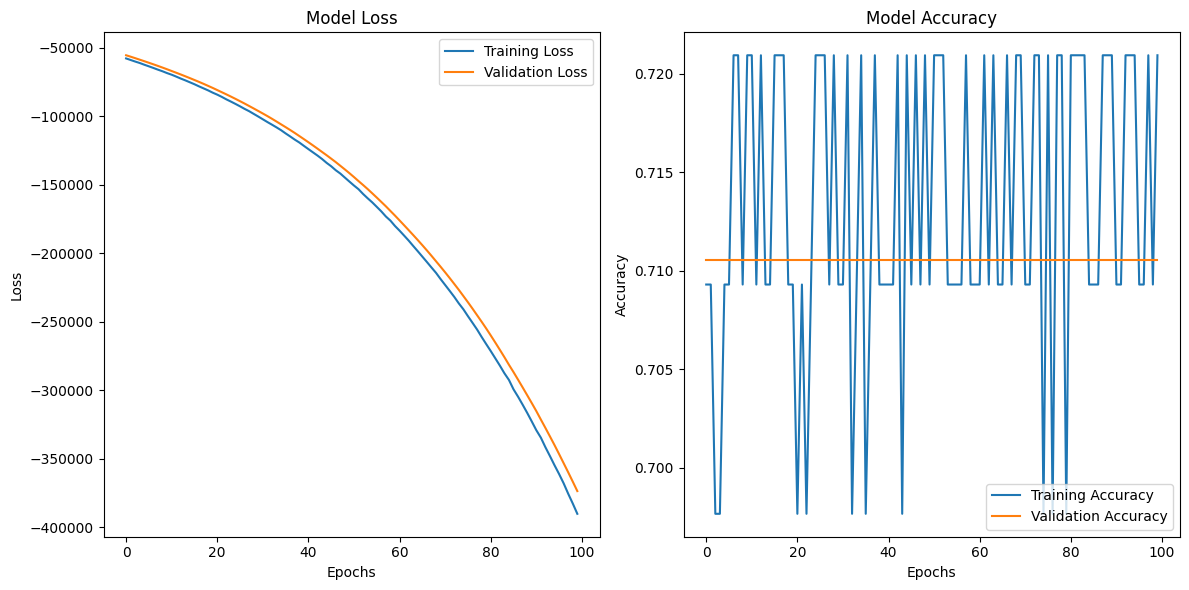

In [35]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# 19 answer

In [34]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2/2 [==============================] - 0s 8ms/step - loss: -363550.4062 - accuracy: 0.7037
Test Loss: -363550.40625
Test Accuracy: 0.7037037014961243
